In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
import random
import warnings
warnings.filterwarnings('ignore')

### **Exercise 1:**
**Read the csv file "matplotlib_data.csv", it contains two columns, first the responder_id and second the LanguagesWorkedWith. Each row of LanguagesWorkedWith column contains the languages the responder is working with seperated by a semicolon. use pandas and matplotlib to visualize which languages are the most popular ones. Make a horizontal bar (plt.barh) plot for the same which should look something like the image "exercise1.png"**

In [ ]:
matplotlib_data = pd.read_csv('matplotlib_data.csv')

In [ ]:
matplotlib_data.shape

(87569, 2)

In [ ]:
matplotlib_data.head()

,Responder_id,LanguagesWorkedWith
0,1,HTML/CSS;Java;JavaScript;Python
1,2,C++;HTML/CSS;Python
2,3,HTML/CSS
3,4,C;C++;C#;Python;SQL
4,5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA


In [ ]:
def popular_languages(col):
  dic = {}
  for ele in col:
    lis = ele.split(';')
    for x in lis:
      if x in dic:
        dic[x] += 1
      else:
        dic[x] = 1
  sorted_dic = sorted(dic.items(), key=lambda x:x[1])
  return dict(sorted_dic)

In [ ]:
language_dic = popular_languages(matplotlib_data['LanguagesWorkedWith'])

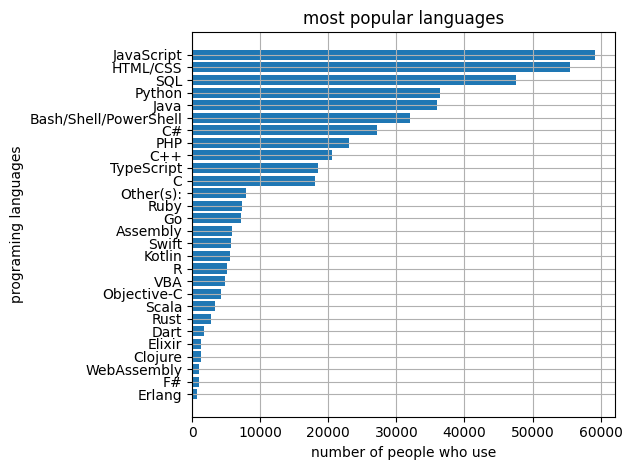

In [ ]:
Languages = list(language_dic.keys())
Users = list(language_dic.values())

plt.barh(Languages,Users)
plt.xlabel('number of people who use')
plt.ylabel('programing languages')
plt.title('most popular languages')
plt.tight_layout()
plt.grid(True)
plt.show() 

### **Exercise 2:**
**Read the csv file "median_salary.csv". Compute the median of Python salary. plot a figure like "exercise2.png" in which the region above the median is filled with green and below is filled with red. hint: use the "where" argument of the plt.fill_between.**

In [ ]:
salary_data = pd.read_csv('median_salary.csv')

In [ ]:
salary_data.shape

(38, 4)

In [ ]:
salary_data.head()

,Age,All_Devs,Python,JavaScript
0,18,17784,20046,16446
1,19,16500,17100,16791
2,20,18012,20000,18942
3,21,20628,24744,21780
4,22,25206,30500,25704


In [ ]:
median_of_Python_salary = salary_data['Python'].median()
median_of_Python_salary

84016.0

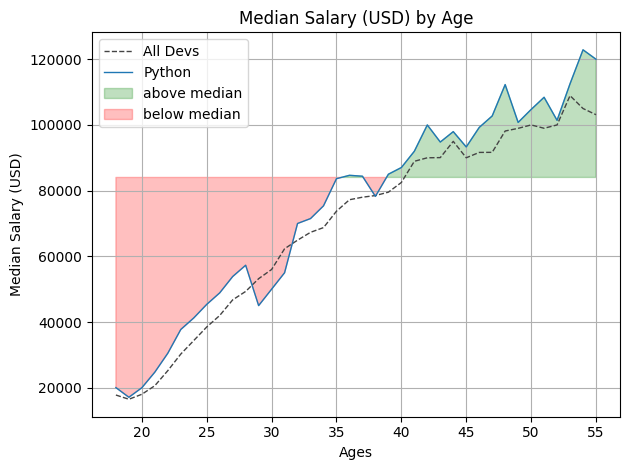

In [ ]:
ages = salary_data['Age']
all_dev_salaries = salary_data['All_Devs']
python_salaries = salary_data['Python']

plt.plot(ages, all_dev_salaries, color='#444444', linewidth = '1',
         linestyle='--', label='All Devs')
plt.plot(ages, python_salaries, linewidth = '1',label='Python')
plt.fill_between(ages,python_salaries,median_of_Python_salary,where = (python_salaries > median_of_Python_salary),
                 color = 'green', alpha = 0.25, interpolate=True, label = 'above median')
plt.fill_between(ages,python_salaries,median_of_Python_salary,where = (python_salaries < median_of_Python_salary),
                 color = 'red', alpha = 0.25, interpolate=True, label = 'below median') 
plt.legend()
plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.tight_layout()
plt.grid(True)
plt.show()

### **Exercise 3:**
**Read the csv file 'histo_data.csv'. make a histogram like in the figure "exercise3.png" containing a line denoting the median age.**

In [ ]:
histo_data = pd.read_csv('histo_data.csv')

In [ ]:
histo_data.shape

(79210, 2)

In [ ]:
histo_data.head()

,Responder_id,Age
0,1,14
1,2,19
2,3,28
3,4,22
4,5,30


In [ ]:
ages = histo_data['Age']
bins = [0,20,40,60,80,100]
median_age = histo_data['Age'].median()

In [ ]:
median_age

29.0

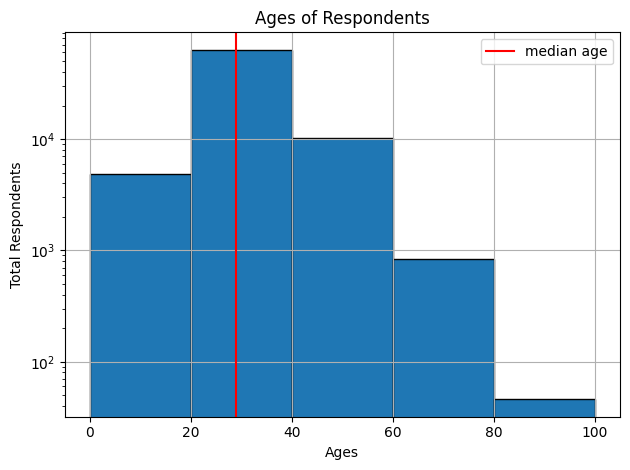

In [ ]:
plt.axvline(x = median_age, color = 'red', label = 'median age')
plt.hist(ages, bins = bins, log = True, edgecolor = 'k')
plt.title('Ages of Respondents')
plt.xlabel('Ages')
plt.ylabel('Total Respondents')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

### **Exercise 4:**
**Read the csv file 'scattar_data.csv'. make a scatter plot like in the figure 'exercise4.png' containing a scatter plot of total likes vs view counts.**

In [ ]:
scattar_data = pd.read_csv('scattar_data.csv')

In [ ]:
scattar_data.shape

(200, 3)

In [ ]:
scattar_data.head()

,view_count,likes,ratio
0,8036001,324742,96.91
1,9378067,562589,98.19
2,2182066,273650,99.38
3,6525864,94698,96.25
4,9481284,582481,97.22


In [ ]:
# outlier = scattar_data['view_count'].quantile(0.95)
# scattar_data = scattar_data[scattar_data['view_count'] < outlier]

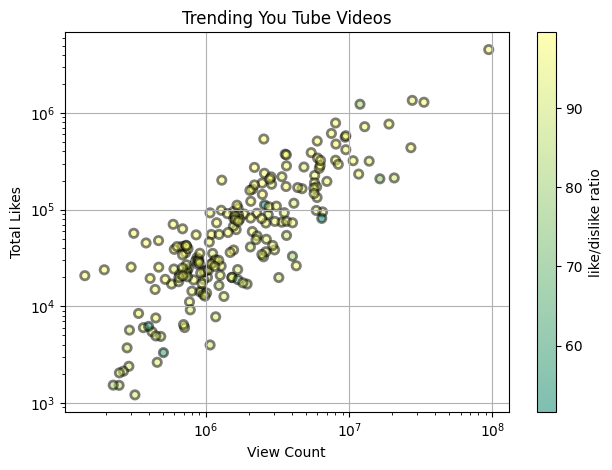

In [ ]:
plt.scatter(scattar_data['view_count'], scattar_data['likes'], c = scattar_data['ratio'],
            marker = 'o', cmap = "summer", edgecolor = 'k', linewidth = 2, alpha = 0.5) 

cbar = plt.colorbar()
cbar.set_label('like/dislike ratio')
plt.xscale('log')
plt.yscale('log')
plt.title('Trending You Tube Videos')
plt.xlabel('View Count')
plt.ylabel('Total Likes')
plt.tight_layout()
plt.grid(True)
plt.show()

### **Exercise 5:**
**Read the csv file 'time_series.csv'. make a time series graph like in the figure 'exercise5.png'**

In [ ]:
time_series_data = pd.read_csv('time_series.csv')

In [ ]:
time_series_data.shape

(15, 7)

In [ ]:
time_series_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,18-05-2019,7266.080078,8281.660156,7257.259766,8193.139648,8193.139648,723011166
1,19-05-2019,8193.139648,8193.139648,7591.850098,7998.290039,7998.290039,637617163
2,20-05-2019,7998.290039,8102.319824,7807.770020,7947.930176,7947.930176,357803946
3,21-05-2019,7947.930176,8033.759766,7533.660156,7626.890137,7626.890137,424501866
4,22-05-2019,7626.890137,7971.259766,7478.740234,7876.500000,7876.500000,386766321


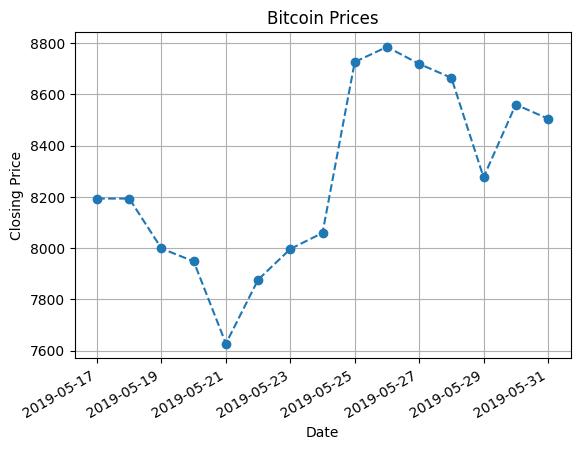

In [ ]:
dates = pd.to_datetime(time_series_data['Date']).values
closing_price = time_series_data['Close'].values
idx = np.argsort(dates)
dates = dates[idx]
closing_price = closing_price[idx]
plt.plot_date(dates, closing_price, linestyle = '--')
plt.gcf().autofmt_xdate()
plt.title('Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

### **Exercise 6:**

##### **1) Read the csv file "apple.csv"**

In [ ]:
apple_data = pd.read_csv('apple.csv')

In [ ]:
apple_data.shape

(1260, 7)

In [ ]:
apple_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-03,41.910000,42.187500,41.220001,42.097500,40.132439,121112000
1,2018-04-04,41.220001,43.002499,41.192501,42.902500,40.899860,138422000
2,2018-04-05,43.145000,43.557499,43.020000,43.200001,41.183472,107732800
3,2018-04-06,42.742500,43.119999,42.049999,42.095001,40.130054,140021200
4,2018-04-09,42.470001,43.272499,42.462502,42.512501,40.528069,116070800


##### **2) Compute the min, max, mean, median, mode of each "Open", "Close", "High", "Low" for every quater from the beginning to the end**

In [ ]:
apple_data['Date'] = pd.to_datetime(apple_data['Date'])

In [ ]:
def mode(col):
  return col.mode()[0]

In [ ]:
apple_data.groupby(apple_data['Date'].dt.to_period('Q')).agg({'Open': ['min','max','mean','median',mode],
                                                              'Close': ['min','max','mean','median',mode],
                                                              'High': ['min','max','mean','median',mode],
                                                              'Low': ['min','max','mean','median',mode]})

Open                                                  \
               min         max        mean      median        mode   
Date                                                                 
2018Q2   40.532501   48.535000   45.359524   46.517502   46.587502   
2018Q3   45.955002   57.247501   52.006389   52.540001   47.945000   
2018Q4   37.037498   57.695000   48.632659   48.474998   37.037498   
2019Q1   35.994999   48.834999   42.335779   42.812500   42.427502   
2019Q2   43.860001   52.722500   48.615635   49.112499   49.669998   
2019Q3   48.852501   56.200001   52.271328   52.031250   52.115002   
2019Q4   54.607498   72.779999   64.142500   65.275002   54.607498   
2020Q1   57.020000   81.184998   73.282944   75.577503   57.020000   
2020Q2   60.084999   91.250000   77.244683   78.292503   60.084999   
2020Q3   90.987503  137.589996  109.268945  111.058750   90.987503   
2020Q4  109.110001  138.050003  120.305469  118.820000  113.910004   
2021Q1  119.029999  143.600006  128.612459  128.410004  121.650002   
2021Q2  123.160004  136.470001  129.437937  129.410004  127.820000   
2021Q3  136.600006  156.979996  147.152188  146.814995  136.600006   
2021Q4  139.470001  181.119995  157.492188  151.495003  139.470001   
2022Q1  150.899994  182.630005  168.026774  169.450005  150.899994   
2022Q2  130.070007  177.500000  151.665323  148.720001  130.070007   
2022Q3  136.039993  173.750000  156.682812  155.430000  136.039993   
2022Q4  127.989998  155.080002  142.966191  143.020004  127.989998   
2023Q1  126.010002  162.440002  146.924033  149.180000  126.010002   
2023Q2  164.270004  164.270004  164.270004  164.270004  164.270004   

             Close                                                  \
               min         max        mean      median        mode   
Date                                                                 
2018Q2   40.580002   48.494999   45.407540   46.375000   43.200001   
2018Q3   45.980000   57.090000   52.075000   52.560001   45.980000   
2018Q4   36.707500   58.017502   48.478016   48.382500   36.707500   
2019Q1   35.547501   48.772499   42.415943   42.764999   35.547501   
2019Q2   43.325001   52.937500   48.723175   49.294998   43.325001   
2019Q3   48.334999   55.992500   52.280195   52.021250   48.334999   
2019Q4   54.740002   73.412498   64.332187   65.467499   54.740002   
2020Q1   56.092499   81.800003   73.540927   75.741249   56.092499   
2020Q2   60.227501   91.632500   77.490317   78.285004   60.227501   
2020Q3   91.027496  134.179993  109.115351  111.461250   91.027496   
2020Q4  108.769997  136.690002  120.281250  119.040001  121.779999   
2021Q1  116.360001  143.160004  128.358033  127.830002  116.360001   
2021Q2  122.769997  136.960007  129.568889  129.740005  125.900002   
2021Q3  137.270004  156.690002  147.222969  146.815002  145.639999   
2021Q4  139.139999  180.330002  158.037032  152.030006  139.139999   
2022Q1  150.619995  182.009995  168.163549  168.880005  166.229996   
2022Q2  130.059998  178.440002  151.439194  148.775002  141.660004   
2022Q3  138.199997  174.550003  156.950468  155.580002  138.199997   
2022Q4  126.040001  155.740005  142.911110  143.750000  138.380005   
2023Q1  125.019997  164.899994  147.551129  150.529999  125.019997   
2023Q2  166.169998  166.169998  166.169998  166.169998  166.169998   

              High                                                  \
               min         max        mean      median        mode   
Date                                                                 
2018Q2   41.082500   48.549999   45.732778   46.797501   41.082500   
2018Q3   46.602501   57.417500   52.473532   52.737499   55.462502   
2018Q4   37.887501   58.367500   49.216905   49.294998   37.887501   
2019Q1   36.430000   49.422501   42.764181   43.119999   39.532501   
2019Q2   44.480000   53.827499   49.139563   49.814999   44.480000   
2019Q3   49.517502   56.605000   52.753438   52.320002   49.517502   
2019Q4   55.240002   7

##### **3) Plot "Open", "Close", "High", "Low" in 2x2 grid axis in one figure (different axis). Use subplot.**

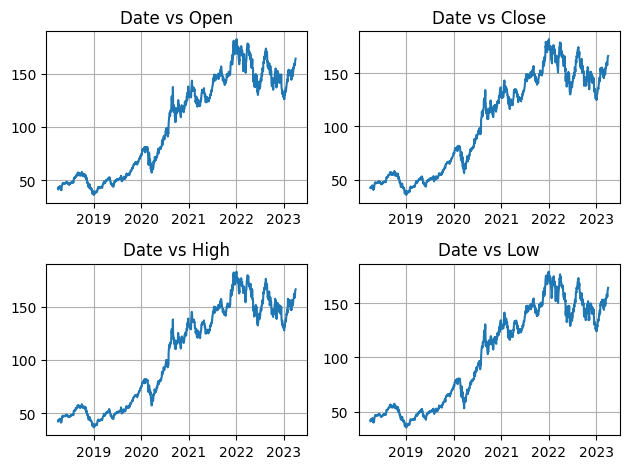

In [ ]:
apple_data["Date"] = pd.to_datetime(apple_data["Date"])
fig, ax = plt.subplots(2,2)

ax[0,0].plot(apple_data['Date'],apple_data['Open'])

ax[0,1].plot(apple_data['Date'],apple_data['Close'])

ax[1,0].plot(apple_data['Date'],apple_data['High'])

ax[1,1].plot(apple_data['Date'],apple_data['Low'])

ax[0, 0].set_title("Date vs Open")
ax[0,0].grid(True)
ax[0, 1].set_title("Date vs Close")
ax[0,1].grid(True)
ax[1, 0].set_title("Date vs High")
ax[1,0].grid(True)
ax[1, 1].set_title("Date vs Low")
ax[1,1].grid(True)
fig.tight_layout()
plt.show()

##### **4) Make a function that takes in a column as an input and randomly removes (makes the value NaN) 200 entries from that column. Use this funtion on "Open", "Close", "High", "Low" columns and remove a total of 800 random values from the dataframe.**

In [ ]:
def make_NaN(col):
  col = col.to_numpy()
  remove_index = random.sample(range(1,len(col)),200)
  col[remove_index] = math.nan
  return pd.Series(col)

In [ ]:
apple_data1 = apple_data.copy()

In [ ]:
apple_data1.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
apple_data1['Open'] = make_NaN(apple_data1['Open'])
apple_data1['Close'] = make_NaN(apple_data1['Close'])
apple_data1['High'] = make_NaN(apple_data1['High'])
apple_data1['Low'] = make_NaN(apple_data1['Low'])

In [ ]:
apple_data1.isna().sum()

Date           0
Open         200
High         200
Low          200
Close        200
Adj Close      0
Volume         0
dtype: int64

In [ ]:
apple_data1.isna().sum().sum()

800

##### **5) Use interpolation techniques (like linear, spline) to impute the missing values in each column.**

In [ ]:
apple_data2 = apple_data1.copy()

In [ ]:
apple_data2.isna().sum().sum()

800

In [ ]:
apple_data2['Open'] = apple_data2['Open'].interpolate(method='linear')
apple_data2['Close'] = apple_data2['Close'].interpolate(method='linear')
apple_data2['High'] = apple_data2['High'].interpolate(method='linear')
apple_data2['Low'] = apple_data2['Low'].interpolate(method='linear')

In [ ]:
apple_data2.isna().sum().sum()

0

In [ ]:
apple_data3 = apple_data1.copy()

In [ ]:
apple_data3.isna().sum().sum()

800

In [ ]:
apple_data3['Open'] = apple_data3['Open'].interpolate(method='spline',order=5)
apple_data3['Close'] = apple_data3['Close'].interpolate(method='spline',order=5)
apple_data3['High'] = apple_data3['High'].interpolate(method='spline',order=5)
apple_data3['Low'] = apple_data3['Low'].interpolate(method='spline',order=5)

In [ ]:
apple_data3.isna().sum().sum()

0

##### **6) repeat step 2,3 on this new imputed dataset. Is there any visible drastic changes? Which imputation method has more visible deviation from the original dataset?**

In [ ]:
apple_data2.groupby(apple_data2['Date'].dt.to_period('Q')).agg({'Open': ['min','max','mean','median',mode],
                                                              'Close': ['min','max','mean','median',mode],
                                                              'High': ['min','max','mean','median',mode],
                                                              'Low': ['min','max','mean','median',mode]})

Open                                                  \
               min         max        mean      median        mode   
Date                                                                 
2018Q2   40.532501   48.535000   45.358969   46.517502   46.587502   
2018Q3   45.955002   57.247501   52.005952   52.843750   47.945000   
2018Q4   37.037498   57.695000   48.608651   47.907501   37.037498   
2019Q1   35.994999   48.834999   42.330635   42.812500   42.427502   
2019Q2   43.860001   52.722500   48.583948   49.112499   49.669998   
2019Q3   49.077499   56.200001   52.289258   52.115002   52.115002   
2019Q4   56.267502   72.779999   64.173535   65.275002   56.267502   
2020Q1   57.020000   81.184998   73.190867   75.577503   57.020000   
2020Q2   60.084999   91.102501   77.245893   78.292503   60.084999   
2020Q3   91.279999  137.589996  109.352871  111.555002   91.279999   
2020Q4  109.110001  135.580002  120.177735  118.680000  113.910004   
2021Q1  119.029999  143.429993  128.496804  128.410004  121.650002   
2021Q2  122.760002  136.470001  129.287223  128.982502  127.820000   
2021Q3  136.600006  156.979996  147.119298  146.687496  136.600006   
2021Q4  139.470001  181.119995  157.483438  151.495003  139.470001   
2022Q1  150.899994  182.630005  167.961128  169.450005  150.899994   
2022Q2  130.070007  177.500000  151.761855  148.345001  130.070007   
2022Q3  136.039993  173.750000  156.594375  155.145004  136.039993   
2022Q4  127.989998  155.080002  142.957620  142.869995  127.989998   
2023Q1  126.010002  162.900002  146.850081  149.180000  126.010002   
2023Q2  164.270004  164.270004  164.270004  164.270004  164.270004   

             Close                                                  \
               min         max        mean      median        mode   
Date                                                                 
2018Q2   40.735001   48.494999   45.389901   46.375000   43.200001   
2018Q3   45.980000   57.090000   52.070873   52.883751   45.980000   
2018Q4   36.707500   58.017502   48.530476   48.382500   36.707500   
2019Q1   35.547501   48.772499   42.420922   42.735001   35.547501   
2019Q2   43.325001   52.937500   48.777996   49.467499   43.325001   
2019Q3   48.334999   55.772499   52.224609   51.801250   48.334999   
2019Q4   54.740002   73.412498   64.364297   65.520000   54.740002   
2020Q1   57.310001   81.800003   73.482681   75.741249   57.310001   
2020Q2   60.352501   91.632500   77.564444   78.285004   60.352501   
2020Q3   91.027496  134.179993  109.049609  111.904999   91.027496   
2020Q4  108.769997  136.690002  120.346016  119.040001  121.779999   
2021Q1  116.360001  143.160004  128.306311  127.830002  116.360001   
2021Q2  122.769997  136.960007  129.661428  129.740005  125.900002   
2021Q3  137.270004  156.690002  147.282968  146.875000  145.639999   
2021Q4  140.910004  180.330002  158.046797  152.030006  140.910004   
2022Q1  150.619995  182.009995  168.135726  168.880005  166.229996   
2022Q2  130.059998  178.440002  151.230968  148.775002  148.710007   
2022Q3  138.199997  174.149994  156.947109  155.580002  138.199997   
2022Q4  126.040001  155.740005  142.906772  143.750000  126.040001   
2023Q1  126.360001  164.899994  147.650054  150.567497  126.360001   
2023Q2  166.169998  166.169998  166.169998  166.169998  166.169998   

              High                                                  \
               min         max        mean      median        mode   
Date                                                                 
2018Q2   41.082500   48.520000   45.702579   46.767502   41.082500   
2018Q3   46.602501   57.417500   52.494206   52.737499   46.602501   
2018Q4   37.887501   58.367500   49.218968   49.291250   37.887501   
2019Q1   36.430000   49.422501   42.775752   43.127501   36.430000   
2019Q2   44.480000   53.827499   49.129193   49.712502   44.480000   
2019Q3   49.517502   55.939999   52.735209   52.336668   49.517502   
2019Q4   55.240002   7

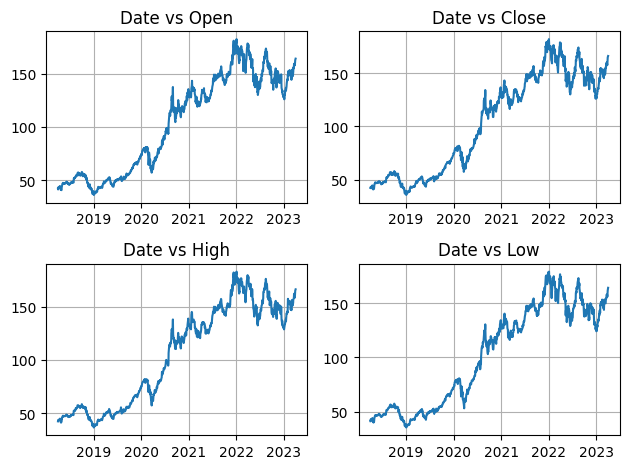

In [ ]:
apple_data2["Date"] = pd.to_datetime(apple_data2["Date"])
fig, ax = plt.subplots(2,2)

ax[0,0].plot(apple_data2['Date'],apple_data2['Open'])

ax[0,1].plot(apple_data2['Date'],apple_data2['Close'])

ax[1,0].plot(apple_data2['Date'],apple_data2['High'])

ax[1,1].plot(apple_data2['Date'],apple_data2['Low'])

ax[0, 0].set_title("Date vs Open")
ax[0,0].grid(True)
ax[0, 1].set_title("Date vs Close")
ax[0,1].grid(True)
ax[1, 0].set_title("Date vs High")
ax[1,0].grid(True)
ax[1, 1].set_title("Date vs Low")
ax[1,1].grid(True)
fig.tight_layout()
plt.show()

In [ ]:
apple_data3.groupby(apple_data3['Date'].dt.to_period('Q')).agg({'Open': ['min','max','mean','median',mode],
                                                              'Close': ['min','max','mean','median',mode],
                                                              'High': ['min','max','mean','median',mode],
                                                              'Low': ['min','max','mean','median',mode]})

Open                                                  \
               min         max        mean      median        mode   
Date                                                                 
2018Q2   40.532501   48.535000   45.377294   46.517502   46.587502   
2018Q3   45.955002   57.247501   52.007253   53.186992   47.945000   
2018Q4   37.037498   57.695000   48.600576   48.563199   37.037498   
2019Q1   35.994999   48.834999   42.352395   42.895000   42.427502   
2019Q2   43.860001   52.722500   48.569683   49.112499   49.669998   
2019Q3   49.077499   56.200001   52.254518   52.072320   52.115002   
2019Q4   55.765036   72.779999   64.114661   65.275002   55.765036   
2020Q1   57.020000   81.184998   73.153355   75.577503   57.020000   
2020Q2   60.084999   91.102501   77.174900   78.292503   60.084999   
2020Q3   91.279999  137.589996  109.531252  112.285000   91.279999   
2020Q4  109.110001  135.580002  120.315525  118.680000  113.910004   
2021Q1  119.029999  143.429993  128.535945  128.410004  121.650002   
2021Q2  122.249877  136.470001  129.262755  129.199997  127.820000   
2021Q3  136.600006  156.979996  147.118061  146.763439  136.600006   
2021Q4  139.470001  181.119995  157.476889  151.495003  139.470001   
2022Q1  150.899994  182.630005  167.859485  169.450005  150.899994   
2022Q2  130.070007  177.500000  151.860481  148.882738  130.070007   
2022Q3  136.039993  173.750000  156.684797  155.156433  136.039993   
2022Q4  127.989998  155.080002  142.918950  142.699997  127.989998   
2023Q1  126.010002  162.744848  146.885703  149.176072  126.010002   
2023Q2  164.270004  164.270004  164.270004  164.270004  164.270004   

             Close                                                  \
               min         max        mean      median        mode   
Date                                                                 
2018Q2   40.735001   48.494999   45.397452   46.375000   43.200001   
2018Q3   45.980000   57.090000   52.061819   52.759755   45.980000   
2018Q4   36.707500   58.017502   48.586816   48.382500   36.707500   
2019Q1   35.547501   48.772499   42.424632   42.823414   35.547501   
2019Q2   43.325001   52.937500   48.780582   49.294998   43.325001   
2019Q3   48.334999   55.772499   52.211171   51.986090   48.334999   
2019Q4   54.740002   73.412498   64.336970   65.520000   54.740002   
2020Q1   57.310001   81.800003   73.470732   75.828950   57.310001   
2020Q2   60.352501   91.632500   77.566536   78.285004   60.352501   
2020Q3   91.027496  134.179993  109.019826  111.904999   91.027496   
2020Q4  108.769997  136.690002  120.513195  119.130001  121.779999   
2021Q1  116.360001  143.160004  128.380527  128.303094  116.360001   
2021Q2  122.769997  136.960007  129.669546  129.740005  125.900002   
2021Q3  137.270004  156.690002  147.211140  146.818631  145.639999   
2021Q4  140.910004  180.330002  158.005005  152.030006  140.910004   
2022Q1  150.619995  182.009995  168.168235  168.880005  166.229996   
2022Q2  130.059998  178.440002  151.211914  148.775002  148.710007   
2022Q3  138.199997  176.673408  157.108656  155.580002  138.199997   
2022Q4  126.040001  155.740005  142.858776  143.595709  126.040001   
2023Q1  126.360001  164.899994  147.667023  150.390241  126.360001   
2023Q2  166.169998  166.169998  166.169998  166.169998  166.169998   

              High                                                  \
               min         max        mean      median        mode   
Date                                                                 
2018Q2   41.082500   48.520000   45.675961   46.632500   41.082500   
2018Q3   46.602501   57.417500   52.518916   52.737499   46.602501   
2018Q4   37.887501   58.367500   49.222377   49.962502   37.887501   
2019Q1   36.430000   49.422501   42.755154   43.250000   36.430000   
2019Q2   44.480000   53.827499   49.133681   49.712502   44.480000   
2019Q3   49.517502   55.994530   52.720054   52.350000   49.517502   
2019Q4   55.240002   7

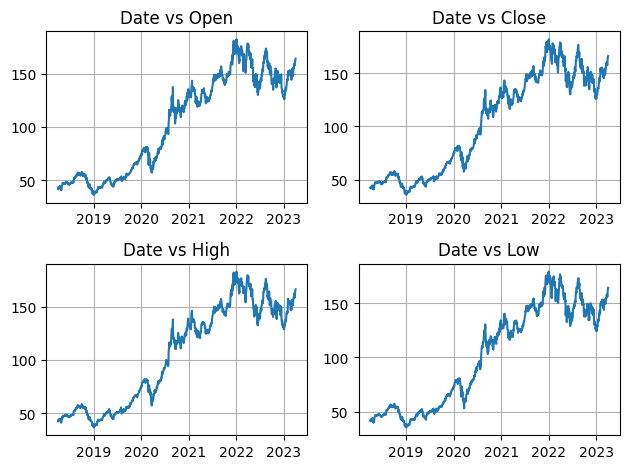

In [ ]:
apple_data3["Date"] = pd.to_datetime(apple_data3["Date"])
fig, ax = plt.subplots(2,2)

ax[0,0].plot(apple_data3['Date'],apple_data3['Open'])

ax[0,1].plot(apple_data3['Date'],apple_data3['Close'])

ax[1,0].plot(apple_data3['Date'],apple_data3['High'])

ax[1,1].plot(apple_data3['Date'],apple_data3['Low'])

ax[0, 0].set_title("Date vs Open")
ax[0,0].grid(True)
ax[0, 1].set_title("Date vs Close")
ax[0,1].grid(True)
ax[1, 0].set_title("Date vs High")
ax[1,0].grid(True)
ax[1, 1].set_title("Date vs Low")
ax[1,1].grid(True)
fig.tight_layout()
plt.show()

**There is no such drastic change in original and new imputed dataset.**